# Unemployment Rate

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_unemp_rate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_unemp = pd.read_csv(body, skiprows=1)
df_unemp.drop([0], inplace=True)
df_unemp.drop('Unnamed: 1', axis=1, inplace=True)
df_unemp.replace(' ','')

df_unemp.rename(columns={'Time': 'Country'}, inplace=True)
df_unemp = df_unemp[df_unemp["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_unemp.set_index('Country', inplace=True)
df_unemp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Spain,19.875,21.408,24.792,26.117,24.450,22.075,19.650,17.233,15.267,14.117
Switzerland,4.803,4.401,4.484,4.747,4.829,4.800,4.919,4.797,4.714,4.394
United Kingdom,7.808,8.058,7.925,7.550,6.142,5.325,4.825,4.350,4.017,3.767
OECD - Total,8.490,8.081,8.061,7.973,7.434,6.866,6.447,5.920,5.481,5.389


In [3]:
unemp_tr = df_unemp.transpose()
unemp_tr

Country,Spain,Switzerland,United Kingdom,OECD - Total
2010,19.875,4.803,7.808,8.490
2011,21.408,4.401,8.058,8.081
2012,24.792,4.484,7.925,8.061
2013,26.117,4.747,7.550,7.973
2014,24.450,4.829,6.142,7.434
2015,22.075,4.800,5.325,6.866
2016,19.650,4.919,4.825,6.447
2017,17.233,4.797,4.350,5.920
2018,15.267,4.714,4.017,5.481
2019,14.117,4.394,3.767,5.389


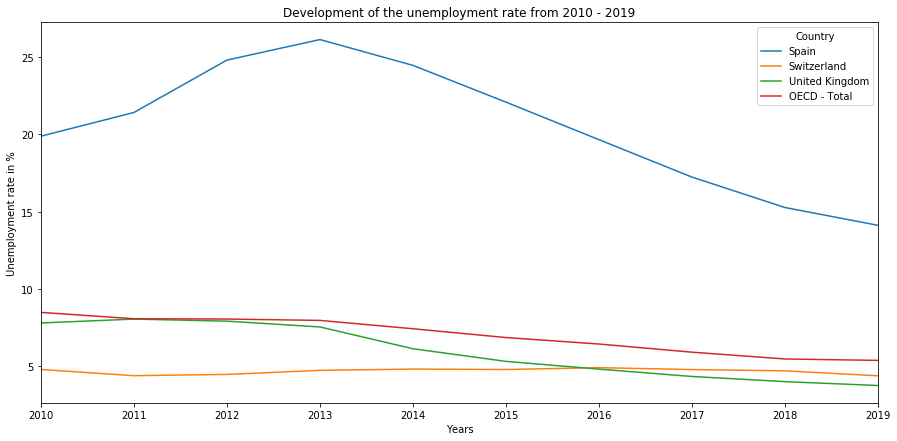

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

unemp_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of the unemployment rate from 2010 - 2019')  
plt.ylabel('Unemployment rate in %')  
plt.xlabel('Years')
plt.show()

# Labour Cost

In [5]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_ULC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ulc = pd.read_csv(body, skiprows=6)
df_ulc.drop('Unnamed: 1', axis=1, inplace=True)
df_ulc.drop([0], inplace=True)
df_ulc.rename(columns={'Time': 'Country'}, inplace=True)
df_ulc = df_ulc[df_ulc["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ulc.replace(' ','')
df_ulc.set_index('Country', inplace=True)
df_ulc.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Spain,105.6,103.8,101.2,100.3,100.0,100.0,99.1,99.5,100.7,103.0
Switzerland,97.5,99.3,100.6,101.2,100.1,100.0,99.3,98.8,98.1,98.8
United Kingdom,95.3,96.0,96.9,99.0,99.9,100.0,102.7,105.0,107.8,111.6


In [6]:
ulc_tr = df_ulc.transpose()
ulc_tr

Country,Spain,Switzerland,United Kingdom
2010,105.6,97.5,95.3
2011,103.8,99.3,96.0
2012,101.2,100.6,96.9
2013,100.3,101.2,99.0
2014,100.0,100.1,99.9
2015,100.0,100.0,100.0
2016,99.1,99.3,102.7
2017,99.5,98.8,105.0
2018,100.7,98.1,107.8
2019,103.0,98.8,111.6


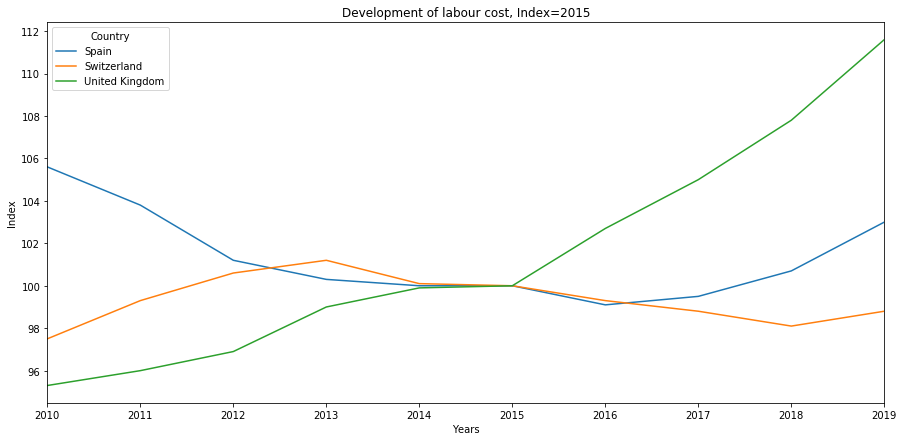

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

ulc_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of labour cost, Index=2015')  
plt.ylabel('Index')  
plt.xlabel('Years')
plt.show()

# Corporate Tax

In [8]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_CorpTax.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ct = pd.read_csv(body, skiprows=3)
df_ct.drop('Unnamed: 1', axis=1, inplace=True)
df_ct.drop(df_ct.loc[0:1].index, inplace=True)
df_ct.rename(columns={'Year': 'Country'}, inplace=True)
df_ct.replace(' ','')
df_ct = df_ct[df_ct["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ct.set_index('Country', inplace=True)
df_ct

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,
Spain,30.0,30.0,30.0,30.0,30.0,28.0,25.0,25.0,25.0
Switzerland,21.2,21.2,21.2,21.1,21.1,21.1,21.1,21.1,21.1
United Kingdom,28.0,26.0,24.0,23.0,21.0,20.0,20.0,19.0,19.0


In [9]:
ct_tr = df_ct.astype(float).T
ct_tr.head(10)

Country,Spain,Switzerland,United Kingdom
2010,30.0,21.2,28.0
2011,30.0,21.2,26.0
2012,30.0,21.2,24.0
2013,30.0,21.1,23.0
2014,30.0,21.1,21.0
2015,28.0,21.1,20.0
2016,25.0,21.1,20.0
2017,25.0,21.1,19.0
2018,25.0,21.1,19.0


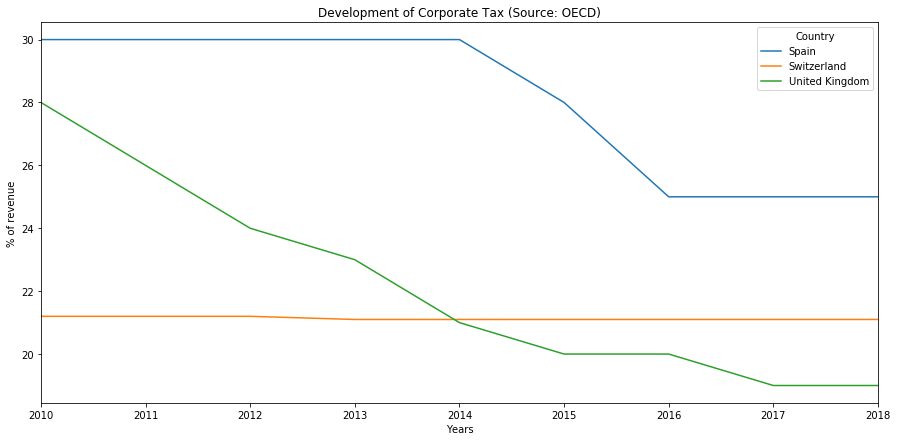

In [10]:
ct_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of Corporate Tax (Source: OECD)')  
plt.ylabel('% of revenue')  
plt.xlabel('Years')
plt.show()

# Labour Wage

In [11]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_ave_wage.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_lw = pd.read_csv(body, skiprows=2, thousands="'")
df_lw.rename(columns={'Time': 'Country'}, inplace=True)
df_lw.drop([0], inplace=True)
df_lw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1, inplace=True)
df_lw.replace(' ','')

df_lw = df_lw[df_lw["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_lw.set_index('Country', inplace=True)
df_lw

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,
Spain,41034.0,40453.0,39302.0,39391.0,39398.0,40088.0,39860.0,39073.0,38761.0
Switzerland,62003.0,62108.0,63207.0,64181.0,64285.0,64223.0,64064.0,63900.0,64109.0
United Kingdom,45527.0,44376.0,44007.0,44141.0,43782.0,44126.0,44466.0,44590.0,44770.0


In [12]:
lw_tr = df_lw.astype(float).T
lw_tr

Country,Spain,Switzerland,United Kingdom
2010,41034.0,62003.0,45527.0
2011,40453.0,62108.0,44376.0
2012,39302.0,63207.0,44007.0
2013,39391.0,64181.0,44141.0
2014,39398.0,64285.0,43782.0
2015,40088.0,64223.0,44126.0
2016,39860.0,64064.0,44466.0
2017,39073.0,63900.0,44590.0
2018,38761.0,64109.0,44770.0


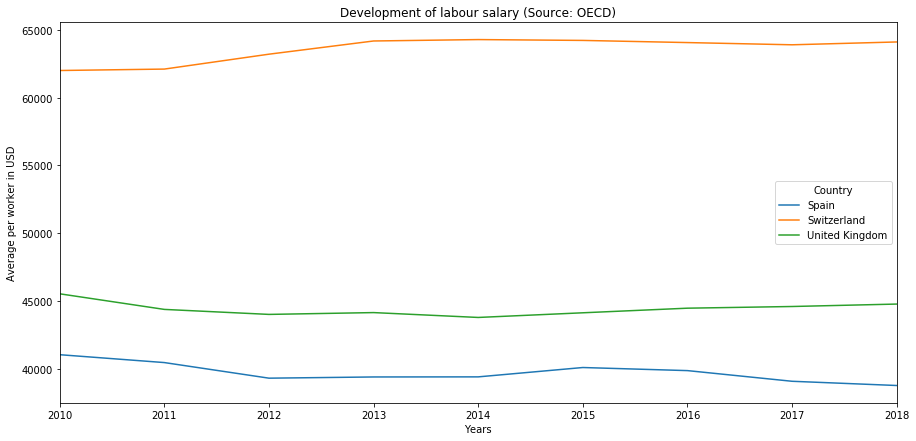

In [13]:
lw_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of labour salary (Source: OECD)')  
plt.ylabel('Average per worker in USD')  
plt.xlabel('Years')
plt.show()

# Corruption Perception Index

In [14]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='CPI2019II.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cpi = pd.read_csv(body, skiprows = 0, index_col=False)
cpi.columns = list(map(str, cpi.columns))
cpi.replace(' ','')

cpi.drop([col for col in cpi.columns if "Sources" in col], axis=1, inplace=True)
cpi.drop([col for col in cpi.columns if "Rank" in col], axis=1, inplace=True)

cpi.head()

,Country,Switzerland,United Kingdom,Spain
0,CPI score 2019,85.0,77.0,62.0
1,Sources 2019,7.0,8.0,8.0
2,Standard error 2019,1.6,3.3,3.2
3,CPI score 2018,85.0,80.0,58.0
4,Sources 2018,7.0,8.0,8.0


In [15]:
cpi_sel = cpi[cpi.index % 3 == 0]
cpi_sel = cpi_sel[['Switzerland', 'United Kingdom','Spain']]
cpi_sel['Year'] = ['2019','2018','2017','2016','2015','2014','2013','2012']
cpi_sel

,Switzerland,United Kingdom,Spain,Year
0,85.0,77.0,62.0,2019
3,85.0,80.0,58.0,2018
6,85.0,82.0,57.0,2017
9,86.0,81.0,58.0,2016
12,86.0,81.0,58.0,2015
15,86.0,78.0,60.0,2014
18,85.0,76.0,59.0,2013
21,86.0,74.0,65.0,2012


In [16]:
cpi_sel.sort_values(['Year'], ascending=True, axis=0, inplace=True)
cpi_sel.set_index('Year', inplace=True)
cpi_sel

,Switzerland,United Kingdom,Spain
Year,,,
2012,86.0,74.0,65.0
2013,85.0,76.0,59.0
2014,86.0,78.0,60.0
2015,86.0,81.0,58.0
2016,86.0,81.0,58.0
2017,85.0,82.0,57.0
2018,85.0,80.0,58.0
2019,85.0,77.0,62.0


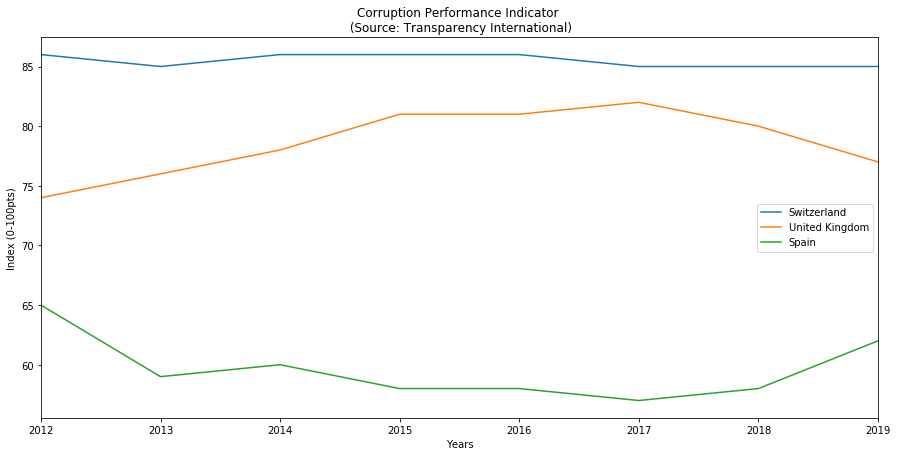

In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

cpi_sel.index = cpi_sel.index.map(int) # let's change the index values of df_top5 to type integer for plotting
cpi_sel.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )

plt.title('Corruption Performance Indicator \n (Source: Transparency International)')
plt.ylabel('Index (0-100pts)')
plt.xlabel('Years')

plt.show()

# Governance Performance Indicators

In [18]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='WorldBank_Governance_Indicators.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

gpi = pd.read_csv(body)
gpi = gpi.dropna()
gpi.drop(['Country Code'], axis=1, inplace=True)
gpi.rename(columns={'Country Name':'Country','2010 [YR2010]':'2010','2011 [YR2011]':'2011','2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017','2018 [YR2018]':'2018'}, inplace=True)
gpi_rank = gpi[gpi['Series Name'].str.match('.*[Rank]$')]
gpi_rank.head()

,Country,Series Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Spain,Accountability: Rank,85.30806,83.09859,82.15962,78.40376,76.84729,82.75862,82.26601,81.28078,82.75862
4,Spain,Rule of Law: Rank,86.25592,85.91549,83.09859,81.69014,80.28846,79.32692,80.76923,81.25000,80.28846
5,Spain,Reg_Quality: Rank,84.21053,81.51659,78.19905,79.14692,75.00000,75.48077,81.25000,79.80769,80.28846
7,Spain,Absence of Violence: Rank,33.64929,48.34123,42.65403,46.91943,55.23809,55.71429,60.95238,56.19048,55.23809
10,Spain,Gov_Effectiveness: Rank,78.94736,81.51659,82.46445,82.93839,84.13461,85.09615,83.17308,81.73077,79.32692


In [ ]:
gpi = gpi_rank.T
gpi.head()

,3,4,5,7,10,11,15,16,17,19,22,23,27,28,29,31,34,35
Country,Spain,Spain,Spain,Spain,Spain,Spain,Switzerland,Switzerland,Switzerland,Switzerland,Switzerland,Switzerland,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
2010,85.3081,86.2559,84.2105,33.6493,78.9474,82.3809,99.0521,94.3128,94.7368,92.4171,97.6077,96.6667,91.9431,94.7867,97.6077,60.1896,91.866,92.3809
2011,83.0986,85.9155,81.5166,48.3412,81.5166,82.4644,98.5915,93.8967,94.7867,94.3128,97.6303,95.7346,92.0188,92.4883,95.2607,58.7678,91.9431,92.4171
2012,82.1596,83.0986,78.199,42.654,82.4644,83.4123,98.1221,96.7136,95.2607,98.5782,97.6303,97.6303,92.4883,92.9578,94.7867,59.7156,92.4171,92.891


In [ ]:
new_header = gpi.iloc[0] #grab the first row for the header
gpi = gpi[1:] #take the data less the header row
gpi.columns = new_header #set the header row as the df header

gpi_spa = gpi.filter(like='Spain')
gpi_che = gpi.filter(like='Switzerland')
gpi_gbr = gpi.filter(like='United Kingdom')
gpi_spa

Country,Spain,Spain,Spain,Spain,Spain,Spain
Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
2010,85.3081,86.2559,84.2105,33.6493,78.9474,82.3809
2011,83.0986,85.9155,81.5166,48.3412,81.5166,82.4644
2012,82.1596,83.0986,78.199,42.654,82.4644,83.4123
2013,78.4038,81.6901,79.1469,46.9194,82.9384,78.199
2014,76.8473,80.2885,75,55.2381,84.1346,72.1154
2015,82.7586,79.3269,75.4808,55.7143,85.0961,69.7115
2016,82.266,80.7692,81.25,60.9524,83.1731,68.2692
2017,81.2808,81.25,79.8077,56.1905,81.7308,68.2692
2018,82.7586,80.2885,80.2885,55.2381,79.3269,72.5961


In [ ]:
spa_header = gpi_spa.iloc[0] #grab the first row for the header
spa_rk = gpi_spa[1:] #take the data less the header row
spa_rk.columns = spa_header #set the header row as the df header
spa_rk.rename_axis('Years', inplace=True)

che_header = gpi_che.iloc[0] #grab the first row for the header
che_rk = gpi_che[1:] #take the data less the header row
che_rk.columns = che_header #set the header row as the df header
che_rk.rename_axis('Years', inplace=True)

gbr_header = gpi_gbr.iloc[0] #grab the first row for the header
gbr_rk = gpi_gbr[1:] #take the data less the header row
gbr_rk.columns = gbr_header #set the header row as the df header
gbr_rk.rename_axis('Years', inplace=True)
gbr_rk

Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
Years,,,,,,
2010,91.9431,94.7867,97.6077,60.1896,91.866,92.3809
2011,92.0188,92.4883,95.2607,58.7678,91.9431,92.4171
2012,92.4883,92.9578,94.7867,59.7156,92.4171,92.891
2013,92.4883,93.8967,96.2085,63.0332,90.5213,93.3649
2014,90.1478,94.7115,97.1154,59.5238,92.7885,93.2692
2015,92.1182,93.75,98.5577,61.4286,94.2308,93.75
2016,93.1034,92.7885,95.1923,58.5714,92.7885,94.2308
2017,93.1034,92.7885,94.2308,59.0476,90.3846,94.7115
2018,93.5961,91.8269,96.1539,48.0952,87.9808,93.2692


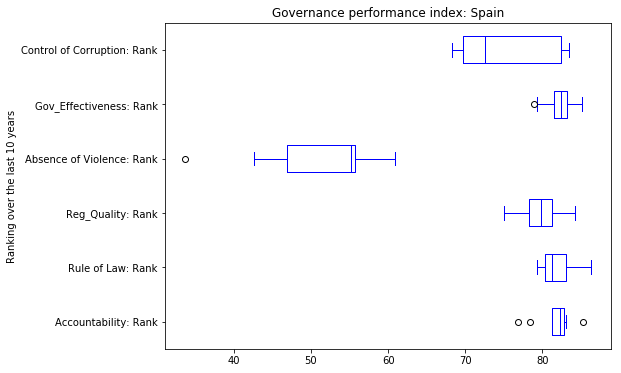

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

spa_rk.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Governance performance index: Spain')
plt.ylabel('Ranking over the last 10 years')

plt.show()

In [ ]:
acc = pd.concat([spa_rk['Accountability: Rank'], che_rk['Accountability: Rank'], gbr_rk['Accountability: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
vio = pd.concat([spa_rk['Absence of Violence: Rank'], che_rk['Absence of Violence: Rank'], gbr_rk['Absence of Violence: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov = pd.concat([spa_rk['Gov_Effectiveness: Rank'], che_rk['Gov_Effectiveness: Rank'], gbr_rk['Gov_Effectiveness: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
cor = pd.concat([spa_rk['Control of Corruption: Rank'], che_rk['Control of Corruption: Rank'], gbr_rk['Control of Corruption: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov.head()

,Spain,Switzerland,United Kingdom
Years,,,
2010,78.9474,97.6077,91.866
2011,81.5166,97.6303,91.9431
2012,82.4644,97.6303,92.4171
2013,82.9384,97.6303,90.5213
2014,84.1346,99.5192,92.7885


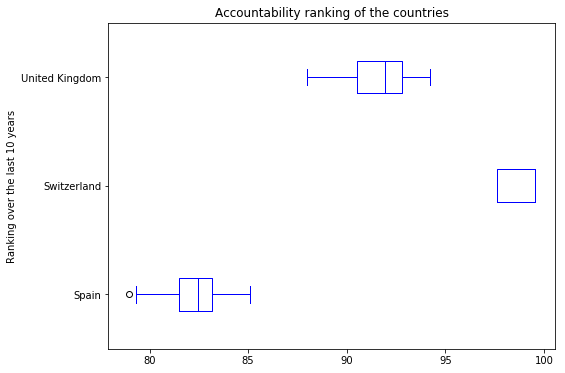

In [ ]:
gov.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Accountability ranking of the countries')
plt.ylabel('Ranking over the last 10 years')

plt.show()

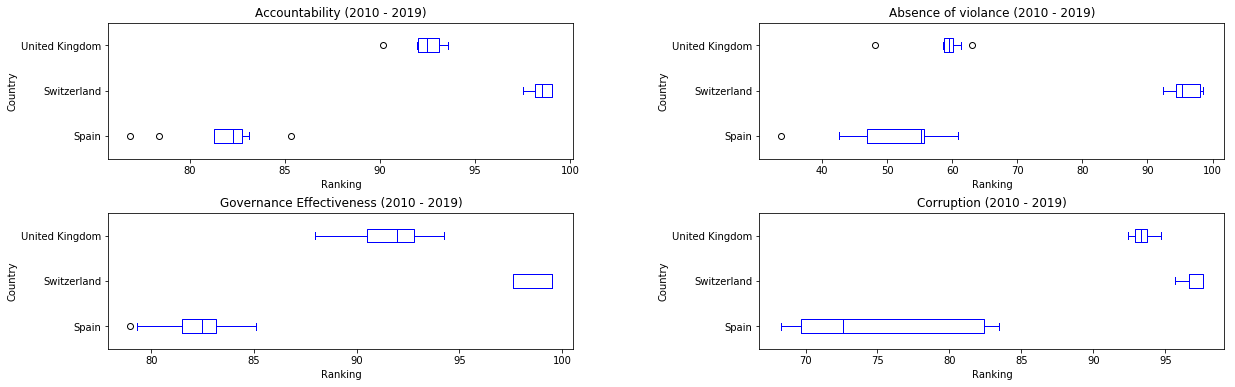

In [ ]:
fig = plt.figure() # create figure
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot, Accountability
acc.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Accountability (2010 - 2019)')
ax0.set_xlabel('Ranking')
ax0.set_ylabel('Country')

# Subplot 2: Box plot, Violence
vio.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Absence of violance (2010 - 2019)')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('Country')

# Subplot 3: Box plot, Governance Effectiveness
gov.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('Governance Effectiveness (2010 - 2019)')
ax2.set_xlabel('Ranking')
ax2.set_ylabel('Country')

# Subplot 4: Box plot, Violence
cor.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax3) # add to subplot 1
ax3.set_title('Corruption (2010 - 2019)')
ax3.set_xlabel('Ranking')
ax3.set_ylabel('Country')

plt.show()

# Propertiy prices in Europe

In [ ]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='PropPriceEUR_light.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

prop = pd.read_csv(body, skiprows=0)
prop = prop.dropna()
prop.head()

,Location,City,Country,Cost
0,"Tirana, Albania",Tirana,Albania,1663.71
1,"Vienna, Austria",Vienna,Austria,7138.82
2,"Minsk, Belarus",Minsk,Belarus,1477.79
3,"Brussels, Belgium",Brussels,Belgium,3353.41
4,"Sarajevo, Bosnia And Herzegovina",Sarajevo,Bosnia And Herzegovina,1747.52


In [ ]:
# importing libraries and files
!conda install -c conda-forge folium=0.5.0 --yes

import pandas as pd 
from pandas import DataFrame, read_csv
import folium

Solving environment: - 

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

In [ ]:
# Creating the EUR map with the three cities imposed
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[51.4934, 0], zoom_start=3, tiles="Mapbox Bright")

# generate choropleth map using the average property cost of each of the three countries
world_map.choropleth(
    geo_data=world_geo,
    data=prop,
    columns=['Country', 'Cost'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

The above map shows that Switzerland and United Kingdom are on the more expensive site in comparison to Spain. Overall are the property cost varying greatly in Europe. Let's see in more detail.  
FYI: For Switzerland, United Kingdom and Spain the actual candidate cities were selected. For all other countries the table is hold the capital city price level.

In [ ]:
sel = prop[prop['City'].isin(['London','Zurich','Barcelona'])]
#sel = sel.rename({'EUR / m2':'Cost'}, axis=1).astype({'Cost': int})
sel.columns = list(map(str, sel.columns))

ctry = sel[['Country','City','Cost']]
ctry.sort_values(by=['Country'], ascending=False)
ctry.replace(' ','')
ctry.reset_index(drop=True, inplace=True) 

ctry

# Macro Evaluation and Decision Tree